<a href="https://colab.research.google.com/github/lukeolson/mse598dm-python-data/blob/main/collecting-organizing-analyzing-basics/collecting-organizing-analyzing-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.fueleconomy.gov/feg/label/images/gaslabel.jpg" width="600px;" alt="gas prices"/>

#   **TOPIC**:  Collecting, organizing, and analyzing data

## Objectives

### Objectives

1. Identify the pieces of a Pandas dataframe for a set of data.
2. Interpret data through plotting. 
3. Apply data filtering techniques to prepare the data for analysis.
4. Organize multiple data sets for analysis.
5. Construct a comparison between two sets of data.

### Questions To Ask

1. What are the column types in your dataframe?
2. How do you plot a column of data?
3. Which data needs to be modified in your dataframe?
4. How do you plot two time series?
5. How would you correlate two series of data?

### What to hand in
1. An attempt at last portion "Your turn..."
2. Answer "Three things I learned from this example..."
    1. ...
    2. ...
    3. ...

## Highlevel topics

- Data importing and storage
- Data cleaning
- Data plotting
- Plot manipulation
- Data analysis using built-in tools

## Synopsis

You are a data scientist working for a DC think tank, and your team is studying technology and energy policy.  To prepare for an upcoming energy sumit you are studying the relationship between **US fuel prices** and **fuel efficiency**, measured in miles-per-gallon.

#### Your Task

Your goal is to identify trends in two different datasets on **US fuel prices** and **fuel efficiency**.

## Datasets

In this session two datasets will be used:
- Automotive Trends Report
    - This dataset provides **miles per gallon** on light-duty vehicles
    - https://www.epa.gov/automotive-trends/explore-automotive-trends-data
    - https://www.epa.gov/automotive-trends/about-automotive-trends-data
    - downloaded as `table_export.csv`
- Retail motor gasoline and on-highway diesel fuel prices
    - This dataset provides **fuel prices**
    - https://www.eia.gov/totalenergy/data/browser/index.php?tbl=T09.04#/
    - (section 9.4) https://www.eia.gov/totalenergy/data/monthly/index.php
    - downlloaded as `MER_T09_04.csv`

Example
```
wget https://www.eia.gov/totalenergy/data/browser/csv.php\?tbl\=T09.04 -O T09_04.csv
```

In [1]:
!wget https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/MER_T09_04.csv
!wget https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/table_export.csv
!ls -lh

--2022-01-27 10:08:11--  https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/MER_T09_04.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 677467 (662K) [text/plain]
Saving to: ‘MER_T09_04.csv.2’

MER_T09_04.csv.2    100%[===================>] 661.59K  --.-KB/s    in 0.02s   

2022-01-27 10:08:11 (42.8 MB/s) - ‘MER_T09_04.csv.2’ saved [677467/677467]

--2022-01-27 10:08:12--  https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/table_export.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.1

## 0. Getting Started

### Setting up Python

First, import a few Python packages that we'll use throught the course.  By convention these are abbreviated on import.

- `matplotlib` and the interface `matplotlib.pyplot` for plotting
- `numpy` for numerical functions and arrays
- `pandas` for data structures and analysis
- `seaborn` for additional plotting and improved figures

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

### Import data

Here we will import the data with Pandas `read_csv` function and store as a *dataframe*.  

What is a *dataframe*?  It's a storage container (provided by Pandas) that functions like a table.  It can also be viewed as a dictionary.  Pandas dataframes have lots of useful functions, many of which we won't use in this lesson (see [Pandas dataframe documenation](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html) for more details).

In [3]:
ecodf = pd.read_csv('table_export.csv')

In [4]:
ecodf

Model Year Regulatory Class Vehicle Type Production Share  \
0            1975              All          All         1.000000   
1            1975              Car      All Car         0.806646   
2            1975              Car  Sedan/Wagon         0.805645   
3            1975            Truck    All Truck         0.193354   
4            1975            Truck       Pickup         0.131322   
..            ...              ...          ...              ...   
371  Prelim. 2021            Truck  Minivan/Van                -   
372  Prelim. 2021              All          All                -   
373  Prelim. 2021            Truck    Truck SUV                -   
374  Prelim. 2021            Truck    All Truck                -   
375  Prelim. 2021            Truck       Pickup                -   

     Real-World MPG  Real-World MPG_City  Real-World MPG_Hwy  \
0          13.05970             12.01552            14.61167   
1          13.45483             12.31413            15.17266   
2          13.45833             12.31742            15.17643   
3          11.63431             10.91165            12.65900   
4          11.91476             11.07827            13.12613   
..              ...                  ...                 ...   
371        26.20616             23.06617            29.20538   
372        25.34024             22.15460            28.42346   
373        23.99702             21.16697            26.68893   
374        22.58129             19.79987            25.25796   
375        19.39958             16.80735            21.95393   

     Real-World CO2 (g/mi)  Real-World CO2_City (g/mi)  \
0                680.59612                   739.73800   
1                660.63740                   721.82935   
2                660.46603                   721.63673   
3                763.86134                   814.45060   
4                745.88139                   802.20090   
..                     ...                         ...   
371              336.16426                   381.30898   
372              348.24205                   398.71693   
373              369.57803                   418.85828   
374              393.74267                   448.92779   
375              461.06113                   532.08045   

     Real-World CO2_Hwy (g/mi)  Weight (lbs)  Horsepower (HP)  \
0                    608.31160      4060.399         137.3346   
1                    585.84724      4057.494         136.1964   
2                    585.70185      4057.565         136.2256   
3                    702.03002      4072.518         142.0826   
4                    677.04643      4011.977         140.9365   
..                         ...           ...              ...   
371                  302.10772      4609.271         231.4091   
372                  310.16749      4287.392         252.2007   
373                  332.40710      4471.763         252.7963   
374                  352.11546      4682.578         276.5167   
375                  407.48515      5204.315         340.8539   

    Footprint (sq. ft.)  
0                     -  
1                     -  
2                     -  
3                     -  
4                     -  
..                  ...  
371            52.60352  
372            51.38513  
373            49.20598  
374            54.12613  
375            66.27408  

[376 rows x 13 columns]

### Example dataframe

Let's construct a mock dataframe to highlight some basic functionality.

In [5]:
mydf = pd.DataFrame(
    {'month': ['January', 'February', 'March'],
     'temperature': [20, 30, 40],
     'snowfall': [12.5, 15, 'trace']
    }
)

We can inspect the dataframe in a few different ways:

- `mydf.info()` shows a highlevel view of the dataframe as a data structure
- `mydf` or `print(mydf)` will give a tabular view

In [6]:
mydf

month  temperature snowfall
0   January           20     12.5
1  February           30       15
2     March           40    trace

In [7]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        3 non-null      object
 1   temperature  3 non-null      int64 
 2   snowfall     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [8]:
mydf

month  temperature snowfall
0   January           20     12.5
1  February           30       15
2     March           40    trace

We can access a given column of a dataframe using the bracket notation with the column label.

In [9]:
mydf['temperature']

0    20
1    30
2    40
Name: temperature, dtype: int64

Also notice that each column is a Pandas *series*.  A series is simply array of values with an index to those values.

In [10]:
type(mydf['temperature'])

pandas.core.series.Series

#### Pandas methods

In the following we'll be doing mainly three things to data stored like `mydf`:

1. formatting the data
2. setting an index
3. cleaning the data

We'll work with the example dataframe for now.  Later, we'll work with the datasets described above and we'll also merge data and introduce some analytics.

In [11]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        3 non-null      object
 1   temperature  3 non-null      int64 
 2   snowfall     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


#### (1)
Let's *format* the data so that the `month` is an actual datetime format.  We can do this using [`pd.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).
For this we need to refer to the string format of dates in Python's `time` format:
https://docs.python.org/3/library/time.html#time.strftime

Notice that `%B` means the month name.

In [12]:
pd.to_datetime('2019 January', format='%Y %B')

Timestamp('2019-01-01 00:00:00')

In [13]:
pd.to_datetime?

In [14]:
pd.to_datetime(mydf['month'], format='%B')

0   1900-01-01
1   1900-02-01
2   1900-03-01
Name: month, dtype: datetime64[ns]

Notice, the above command doesn't  actually change the column of our dataframe `mydf`.

In [15]:
mydf['month']

0     January
1    February
2       March
Name: month, dtype: object

To add a year, we would use `%Y`.  To change our dataframe, we set the column equal to the new series.

In [16]:
mydf['month'] = pd.to_datetime(mydf['month']+'2019', format='%B%Y')

In [17]:
mydf

month  temperature snowfall
0 2019-01-01           20     12.5
1 2019-02-01           30       15
2 2019-03-01           40    trace

In [18]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        3 non-null      datetime64[ns]
 1   temperature  3 non-null      int64         
 2   snowfall     3 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 200.0+ bytes


#### (2)

Each column of a Pandas dataframe is a series and the default is to index this series with integer indices starting at 0.  We can see what the current index values are by accessing the dataframe's `index` attribute (not a function).  We can also set the index to another set of labels, say the months using the dataframe's `set_index()` function.

In [19]:
mydf.index

RangeIndex(start=0, stop=3, step=1)

In [20]:
mydf.set_index('month', inplace=True)

Notice we used `inplace=True` above so it modified `mydf` instead of making a new object.  We can look at the modified index and dataframe:

In [21]:
mydf.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01'], dtype='datetime64[ns]', name='month', freq=None)

In [22]:
mydf

temperature snowfall
month                           
2019-01-01           20     12.5
2019-02-01           30       15
2019-03-01           40    trace

#### (3)

Notice that the last value of snowfall is "trace" (a small amount of snow, but no measurable accumulation).  Unfortunately, this isn't very helpful -- we cannot take the average (or many of the other summary statistics) of a string.

In [23]:
mydf['snowfall'].mean()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

Since "trace" means a small amount, it's fairly reasonable to represent it as 0.  So we're going to construct a function that we can `apply()` to each entry.  Let's check to see if the entry is "trace" and if so, set it to 0.0.

In [24]:
def f(x):
    if x == 'trace':
        return 0.0
    else:
        return x

mydf['snowfall'] = mydf['snowfall'].apply(f)
mydf

temperature  snowfall
month                            
2019-01-01           20      12.5
2019-02-01           30      15.0
2019-03-01           40       0.0

Now that "trace" is removed, we can take the average.

In [25]:
mydf['snowfall'].mean()

9.166666666666666

## 1. The fuel economy dataset

Using the practice from the `mydf` example, let's take a look at the `ecodf` dataframe we obtained above from importing the fuel economy dataset.

In [26]:
ecodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model Year                  376 non-null    object 
 1   Regulatory Class            376 non-null    object 
 2   Vehicle Type                376 non-null    object 
 3   Production Share            376 non-null    object 
 4   Real-World MPG              376 non-null    float64
 5   Real-World MPG_City         376 non-null    float64
 6   Real-World MPG_Hwy          376 non-null    float64
 7   Real-World CO2 (g/mi)       376 non-null    float64
 8   Real-World CO2_City (g/mi)  376 non-null    float64
 9   Real-World CO2_Hwy (g/mi)   376 non-null    float64
 10  Weight (lbs)                376 non-null    float64
 11  Horsepower (HP)             376 non-null    float64
 12  Footprint (sq. ft.)         376 non-null    object 
dtypes: float64(8), object(5)
memory usa

In [27]:
ecodf

Model Year Regulatory Class Vehicle Type Production Share  \
0            1975              All          All         1.000000   
1            1975              Car      All Car         0.806646   
2            1975              Car  Sedan/Wagon         0.805645   
3            1975            Truck    All Truck         0.193354   
4            1975            Truck       Pickup         0.131322   
..            ...              ...          ...              ...   
371  Prelim. 2021            Truck  Minivan/Van                -   
372  Prelim. 2021              All          All                -   
373  Prelim. 2021            Truck    Truck SUV                -   
374  Prelim. 2021            Truck    All Truck                -   
375  Prelim. 2021            Truck       Pickup                -   

     Real-World MPG  Real-World MPG_City  Real-World MPG_Hwy  \
0          13.05970             12.01552            14.61167   
1          13.45483             12.31413            15.17266   
2          13.45833             12.31742            15.17643   
3          11.63431             10.91165            12.65900   
4          11.91476             11.07827            13.12613   
..              ...                  ...                 ...   
371        26.20616             23.06617            29.20538   
372        25.34024             22.15460            28.42346   
373        23.99702             21.16697            26.68893   
374        22.58129             19.79987            25.25796   
375        19.39958             16.80735            21.95393   

     Real-World CO2 (g/mi)  Real-World CO2_City (g/mi)  \
0                680.59612                   739.73800   
1                660.63740                   721.82935   
2                660.46603                   721.63673   
3                763.86134                   814.45060   
4                745.88139                   802.20090   
..                     ...                         ...   
371              336.16426                   381.30898   
372              348.24205                   398.71693   
373              369.57803                   418.85828   
374              393.74267                   448.92779   
375              461.06113                   532.08045   

     Real-World CO2_Hwy (g/mi)  Weight (lbs)  Horsepower (HP)  \
0                    608.31160      4060.399         137.3346   
1                    585.84724      4057.494         136.1964   
2                    585.70185      4057.565         136.2256   
3                    702.03002      4072.518         142.0826   
4                    677.04643      4011.977         140.9365   
..                         ...           ...              ...   
371                  302.10772      4609.271         231.4091   
372                  310.16749      4287.392         252.2007   
373                  332.40710      4471.763         252.7963   
374                  352.11546      4682.578         276.5167   
375                  407.48515      5204.315         340.8539   

    Footprint (sq. ft.)  
0                     -  
1                     -  
2                     -  
3                     -  
4                     -  
..                  ...  
371            52.60352  
372            51.38513  
373            49.20598  
374            54.12613  
375            66.27408  

[376 rows x 13 columns]

Take a look at the columns --- we'll be considering the 'Real-World MPG' for our analysis.

In [28]:
ecodf.columns

Index(['Model Year', 'Regulatory Class', 'Vehicle Type', 'Production Share',
       'Real-World MPG', 'Real-World MPG_City', 'Real-World MPG_Hwy',
       'Real-World CO2 (g/mi)', 'Real-World CO2_City (g/mi)',
       'Real-World CO2_Hwy (g/mi)', 'Weight (lbs)', 'Horsepower (HP)',
       'Footprint (sq. ft.)'],
      dtype='object')

### Plot the MPG

Let's try to plot the values of `Real-World MPG` using the `plot()` method for series.

<AxesSubplot:>

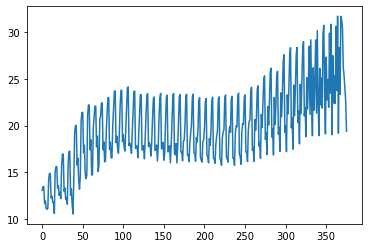

In [29]:
ecodf['Real-World MPG'].plot()

#### How can we improve this?

1. It looks like we're indexing this by integers (the x-axis).  A more helpful view would be years (or dates).
2. From the dataset above, all vehicle types are being plotted (so there are multiple values corresponding to each year).  Try plotting only for the vehicle type `Car SUV`, for example.
3. The plot needs **labels** (axes, legend) and improved formatting (look, size, font).

#### (1) formatting the dates

Let's format the `Model Year` column and set it as our index.

In [30]:
ecodf

Model Year Regulatory Class Vehicle Type Production Share  \
0            1975              All          All         1.000000   
1            1975              Car      All Car         0.806646   
2            1975              Car  Sedan/Wagon         0.805645   
3            1975            Truck    All Truck         0.193354   
4            1975            Truck       Pickup         0.131322   
..            ...              ...          ...              ...   
371  Prelim. 2021            Truck  Minivan/Van                -   
372  Prelim. 2021              All          All                -   
373  Prelim. 2021            Truck    Truck SUV                -   
374  Prelim. 2021            Truck    All Truck                -   
375  Prelim. 2021            Truck       Pickup                -   

     Real-World MPG  Real-World MPG_City  Real-World MPG_Hwy  \
0          13.05970             12.01552            14.61167   
1          13.45483             12.31413            15.17266   
2          13.45833             12.31742            15.17643   
3          11.63431             10.91165            12.65900   
4          11.91476             11.07827            13.12613   
..              ...                  ...                 ...   
371        26.20616             23.06617            29.20538   
372        25.34024             22.15460            28.42346   
373        23.99702             21.16697            26.68893   
374        22.58129             19.79987            25.25796   
375        19.39958             16.80735            21.95393   

     Real-World CO2 (g/mi)  Real-World CO2_City (g/mi)  \
0                680.59612                   739.73800   
1                660.63740                   721.82935   
2                660.46603                   721.63673   
3                763.86134                   814.45060   
4                745.88139                   802.20090   
..                     ...                         ...   
371              336.16426                   381.30898   
372              348.24205                   398.71693   
373              369.57803                   418.85828   
374              393.74267                   448.92779   
375              461.06113                   532.08045   

     Real-World CO2_Hwy (g/mi)  Weight (lbs)  Horsepower (HP)  \
0                    608.31160      4060.399         137.3346   
1                    585.84724      4057.494         136.1964   
2                    585.70185      4057.565         136.2256   
3                    702.03002      4072.518         142.0826   
4                    677.04643      4011.977         140.9365   
..                         ...           ...              ...   
371                  302.10772      4609.271         231.4091   
372                  310.16749      4287.392         252.2007   
373                  332.40710      4471.763         252.7963   
374                  352.11546      4682.578         276.5167   
375                  407.48515      5204.315         340.8539   

    Footprint (sq. ft.)  
0                     -  
1                     -  
2                     -  
3                     -  
4                     -  
..                  ...  
371            52.60352  
372            51.38513  
373            49.20598  
374            54.12613  
375            66.27408  

[376 rows x 13 columns]

In [31]:
pd.to_datetime(ecodf['Model Year'], format='%Y')

ValueError: time data 'Prelim. 2021' does not match format '%Y' (match)

Since the most recent data is marked as preliminary, it's a string that isn't being recognized as a year.
We'll have to work around that manually.

In [32]:
'Prelim. 2021'.split()[-1]

'2021'

In [33]:
def f(t):
    if 'Prelim.' in t:
        t = t.split(' ')[-1]
    return t

ecodf['Model Year'] = ecodf['Model Year'].apply(f)
ecodf['Model Year'] = pd.to_datetime(ecodf['Model Year'], format='%Y')

In [34]:
ecodf.set_index('Model Year', inplace=True)
ecodf

Regulatory Class Vehicle Type Production Share  Real-World MPG  \
Model Year                                                                  
1975-01-01              All          All         1.000000        13.05970   
1975-01-01              Car      All Car         0.806646        13.45483   
1975-01-01              Car  Sedan/Wagon         0.805645        13.45833   
1975-01-01            Truck    All Truck         0.193354        11.63431   
1975-01-01            Truck       Pickup         0.131322        11.91476   
...                     ...          ...              ...             ...   
2021-01-01            Truck  Minivan/Van                -        26.20616   
2021-01-01              All          All                -        25.34024   
2021-01-01            Truck    Truck SUV                -        23.99702   
2021-01-01            Truck    All Truck                -        22.58129   
2021-01-01            Truck       Pickup                -        19.39958   

            Real-World MPG_City  Real-World MPG_Hwy  Real-World CO2 (g/mi)  \
Model Year                                                                   
1975-01-01             12.01552            14.61167              680.59612   
1975-01-01             12.31413            15.17266              660.63740   
1975-01-01             12.31742            15.17643              660.46603   
1975-01-01             10.91165            12.65900              763.86134   
1975-01-01             11.07827            13.12613              745.88139   
...                         ...                 ...                    ...   
2021-01-01             23.06617            29.20538              336.16426   
2021-01-01             22.15460            28.42346              348.24205   
2021-01-01             21.16697            26.68893              369.57803   
2021-01-01             19.79987            25.25796              393.74267   
2021-01-01             16.80735            21.95393              461.06113   

            Real-World CO2_City (g/mi)  Real-World CO2_Hwy (g/mi)  \
Model Year                                                          
1975-01-01                   739.73800                  608.31160   
1975-01-01                   721.82935                  585.84724   
1975-01-01                   721.63673                  585.70185   
1975-01-01                   814.45060                  702.03002   
1975-01-01                   802.20090                  677.04643   
...                                ...                        ...   
2021-01-01                   381.30898                  302.10772   
2021-01-01                   398.71693                  310.16749   
2021-01-01                   418.85828                  332.40710   
2021-01-01                   448.92779                  352.11546   
2021-01-01                   532.08045                  407.48515   

            Weight (lbs)  Horsepower (HP) Footprint (sq. ft.)  
Model Year                                                     
1975-01-01      4060.399         137.3346                   -  
1975-01-01      4057.494         136.1964                   -  
1975-01-01      4057.565         136.2256                   -  
1975-01-01      4072.518         142.0826                   -  
1975-01-01      4011.977         140.9365                   -  
...                  ...              ...                 ...  
2021-01-01      4609.271         231.4091            52.60352  
2021-01-01      4287.392         252.2007            51.38513  
2021-01-01      4471.763         252.7963            49.20598  
2021-01-01      4682.578         276.5167            54.12613  
2021-01-01      5204.315         340.8539            66.27408  

[376 rows x 12 columns]

<AxesSubplot:xlabel='Model Year'>

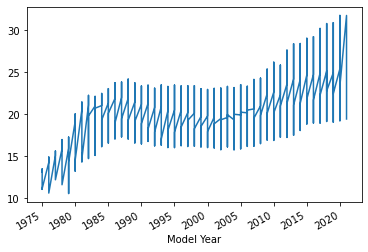

In [35]:
ecodf['Real-World MPG'].plot()

#### (2)

We still have multiple vehicle types being plotted for each year (the large oscillating pattern).
Now check to see where the `Vehicle Type` is equal to `Car SUV` and only plot that data.

<AxesSubplot:xlabel='Model Year'>

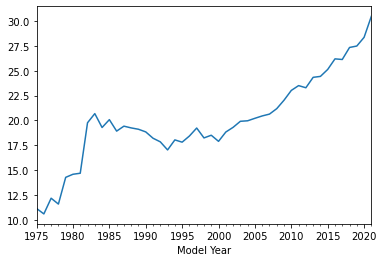

In [36]:
ecodf[
ecodf['Vehicle Type']=='Car SUV'
]['Real-World MPG'].plot()

#### (3)

Note that changing the index automatically applied the index column label as the x-axis label.

But, there's still a lot we can do to improve the plot with more labels and other
visual formatting changes.

First, we'll adjust the image size, add axis labels/legend, and make the line thicker.


Text(0, 0.5, 'Miles Per Gallon')

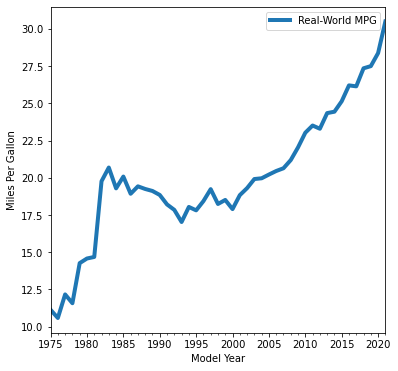

In [37]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ecodf[
    ecodf['Vehicle Type']=='Car SUV'
]['Real-World MPG'].plot(ax=ax, linewidth=4)

ax.legend()
plt.ylabel('Miles Per Gallon')

We can also change the fontsize and the general look.

https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

Text(0.5, 0, 'Year')

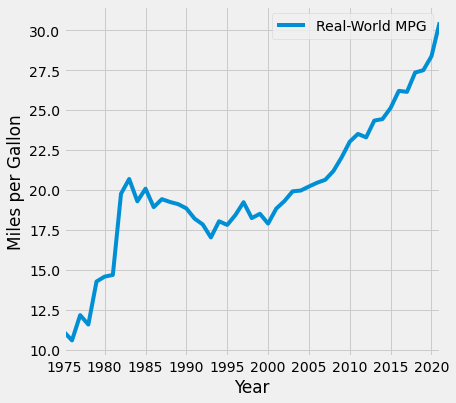

In [38]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ecodf[
    ecodf['Vehicle Type']=='Car SUV'
]['Real-World MPG'].plot(ax=ax, linewidth=4)

ax.legend()
plt.ylabel('Miles per Gallon')
plt.xlabel('Year')

The data has a lot of small variation that can make it
harder to see the overall trend.  Let's plot smoothed
data from a rolling average 
by combining the Pandas series functions `.rolling()` and `.mean()`.

Text(0.5, 0, 'Year')

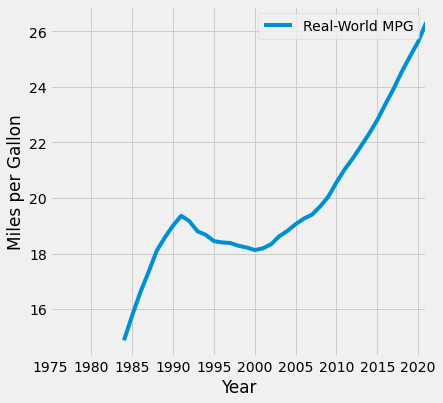

In [39]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ecodf[
    ecodf['Vehicle Type']=='Car SUV'
]['Real-World MPG'].rolling(10).mean().plot(ax=ax, linewidth=4)

ax.legend()
plt.ylabel('Miles per Gallon')
plt.xlabel('Year')

## 2. Your turn, the fuel prices dataset

The goal of this portion of the notebook is to construct a correlation between **fuel prices** and **fuel efficiency**.  We've already imported and formatted the fuel efficiency dataset, but you'll be starting from the original .csv for the fuel prices dataset.

To do this consider the following challenge questions:

1. How do you format the fuel price data with a `datetime` index?  It may be helpful to distinguish between monthly values and yearly averages (the yearly averages end in "13" for this dataset).

2. How should you handle missing data in the `Value` column?

3. Do you see a trend in regular unleaded gas prices? (the column is `RUUCUUS` for regular unleaded gas)

4. Find a correlation between the **fuel price** and **fuel efficiency**.  To do this you may want to combine the relevant values from the different dataframes using `pd.merge_asof()` and then use the function `.corr()` on the combined dataframe.

5. Try to plot the **fuel price** and **fuel efficiency** on the same plot, but with different y-axis scales -- do you observe a correlation?

6. Plot **fuel price** and **fuel efficiency** using a rolling average, for example `rolling(5).mean()` on a Pandas series to display a 5 year rolling average.  See above for an example of rolling average.  Plot the rolling averages like you plotted the values in the previous question.

5. (*) Use seaborn's `jointplot()` to plot MPG vs Price to deduce a correlation.  `import seaborn as sns`

### Getting started

First import the data

In [40]:
pricedf = pd.read_csv('MER_T09_04.csv')
pricedf

MSN  YYYYMM  Value  Column_Order  \
0     RLUCUUS  194913  0.268             1   
1     RLUCUUS  195013  0.268             1   
2     RLUCUUS  195113  0.272             1   
3     RLUCUUS  195213  0.274             1   
4     RLUCUUS  195313  0.287             1   
...       ...     ...    ...           ...   
5267  DFONUUS  202107  3.339             8   
5268  DFONUUS  202108   3.35             8   
5269  DFONUUS  202109  3.384             8   
5270  DFONUUS  202110  3.612             8   
5271  DFONUUS  202111  3.727             8   

                                            Description  \
0     Leaded Regular Gasoline, U.S. City Average Ret...   
1     Leaded Regular Gasoline, U.S. City Average Ret...   
2     Leaded Regular Gasoline, U.S. City Average Ret...   
3     Leaded Regular Gasoline, U.S. City Average Ret...   
4     Leaded Regular Gasoline, U.S. City Average Ret...   
...                                                 ...   
5267                       On-Highway Diesel Fuel Price   
5268                       On-Highway Diesel Fuel Price   
5269                       On-Highway Diesel Fuel Price   
5270                       On-Highway Diesel Fuel Price   
5271                       On-Highway Diesel Fuel Price   

                                    Unit  
0     Dollars per Gallon Including Taxes  
1     Dollars per Gallon Including Taxes  
2     Dollars per Gallon Including Taxes  
3     Dollars per Gallon Including Taxes  
4     Dollars per Gallon Including Taxes  
...                                  ...  
5267  Dollars per Gallon Including Taxes  
5268  Dollars per Gallon Including Taxes  
5269  Dollars per Gallon Including Taxes  
5270  Dollars per Gallon Including Taxes  
5271  Dollars per Gallon Including Taxes  

[5272 rows x 6 columns]

In [41]:
pricedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5272 entries, 0 to 5271
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5272 non-null   object
 1   YYYYMM        5272 non-null   int64 
 2   Value         5272 non-null   object
 3   Column_Order  5272 non-null   int64 
 4   Description   5272 non-null   object
 5   Unit          5272 non-null   object
dtypes: int64(2), object(4)
memory usage: 247.2+ KB


Next, do two things:

1. Make a column called `Data Type` and mark it as `AVG` if the year string contains a `13`.
2. For each row that's an `AVG`, format the year string in one way.

In [42]:
def f(x):
    # Create string of YYYYMM
    x = str(x)
    if x[-2:] == '13':
        return 'AVG'
    else:
        return ''

pricedf['Data Type'] = pricedf['YYYYMM'].apply(f)

In [43]:
pricedf

MSN  YYYYMM  Value  Column_Order  \
0     RLUCUUS  194913  0.268             1   
1     RLUCUUS  195013  0.268             1   
2     RLUCUUS  195113  0.272             1   
3     RLUCUUS  195213  0.274             1   
4     RLUCUUS  195313  0.287             1   
...       ...     ...    ...           ...   
5267  DFONUUS  202107  3.339             8   
5268  DFONUUS  202108   3.35             8   
5269  DFONUUS  202109  3.384             8   
5270  DFONUUS  202110  3.612             8   
5271  DFONUUS  202111  3.727             8   

                                            Description  \
0     Leaded Regular Gasoline, U.S. City Average Ret...   
1     Leaded Regular Gasoline, U.S. City Average Ret...   
2     Leaded Regular Gasoline, U.S. City Average Ret...   
3     Leaded Regular Gasoline, U.S. City Average Ret...   
4     Leaded Regular Gasoline, U.S. City Average Ret...   
...                                                 ...   
5267                       On-Highway Diesel Fuel Price   
5268                       On-Highway Diesel Fuel Price   
5269                       On-Highway Diesel Fuel Price   
5270                       On-Highway Diesel Fuel Price   
5271                       On-Highway Diesel Fuel Price   

                                    Unit Data Type  
0     Dollars per Gallon Including Taxes       AVG  
1     Dollars per Gallon Including Taxes       AVG  
2     Dollars per Gallon Including Taxes       AVG  
3     Dollars per Gallon Including Taxes       AVG  
4     Dollars per Gallon Including Taxes       AVG  
...                                  ...       ...  
5267  Dollars per Gallon Including Taxes            
5268  Dollars per Gallon Including Taxes            
5269  Dollars per Gallon Including Taxes            
5270  Dollars per Gallon Including Taxes            
5271  Dollars per Gallon Including Taxes            

[5272 rows x 7 columns]

In [44]:
def g(x):
    x = str(x)
    if x[-2:] == '13':
        return x[:-2]
    else:
        return x[:-2] + " " + x[-2:]

pricedf['YYYYMM'] = pricedf['YYYYMM'].apply(g)

In [45]:
pricedf['YYYYMM'] = pd.to_datetime(pricedf['YYYYMM'])

In [46]:
pricedf.rename(columns = {'YYYYMM': 'Year'}, inplace=True)

In [47]:
pd.to_datetime(pricedf['Year'])

0      1949-01-01
1      1950-01-01
2      1951-01-01
3      1952-01-01
4      1953-01-01
          ...    
5267   2021-07-01
5268   2021-08-01
5269   2021-09-01
5270   2021-10-01
5271   2021-11-01
Name: Year, Length: 5272, dtype: datetime64[ns]

Now check to see what all of the `AVG` `Value` numbers look like.

In [48]:
pricedf[pricedf['Data Type']=='AVG']['Value']

0       0.268
1       0.268
2       0.272
3       0.274
4       0.287
        ...  
5208    2.304
5221     2.65
5234    3.178
5247    3.056
5260    2.551
Name: Value, Length: 576, dtype: object

For the next step you'll want to 

1. try to convert a number to a float
2. if the convertion doesn't work, then use not-a-number (`np.nan`)

In [49]:
try:
    a = 1/0
except:
    print('oops, division by zero')

oops, division by zero


In [50]:
def h(x):
    try:
        x = float(x)
    except:
        x = np.nan
    return x

In [51]:
pricedf['Value'] = pricedf['Value'].apply(h)

Try using both the fuel average `AVG` and the vehicle `RLUCUUS`

Here's a reminder:

In [52]:
mydf.info()
mydf[
    (mydf['temperature'] == 20)
    &
    (mydf['snowfall'] == 12.5)
]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2019-01-01 to 2019-03-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3 non-null      int64  
 1   snowfall     3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 72.0 bytes


temperature  snowfall
month                            
2019-01-01           20      12.5

In [53]:
pricedf.set_index('Year', inplace=True)

In [54]:
pricedf

MSN  Value  Column_Order  \
Year                                       
1949-01-01  RLUCUUS  0.268             1   
1950-01-01  RLUCUUS  0.268             1   
1951-01-01  RLUCUUS  0.272             1   
1952-01-01  RLUCUUS  0.274             1   
1953-01-01  RLUCUUS  0.287             1   
...             ...    ...           ...   
2021-07-01  DFONUUS  3.339             8   
2021-08-01  DFONUUS  3.350             8   
2021-09-01  DFONUUS  3.384             8   
2021-10-01  DFONUUS  3.612             8   
2021-11-01  DFONUUS  3.727             8   

                                                  Description  \
Year                                                            
1949-01-01  Leaded Regular Gasoline, U.S. City Average Ret...   
1950-01-01  Leaded Regular Gasoline, U.S. City Average Ret...   
1951-01-01  Leaded Regular Gasoline, U.S. City Average Ret...   
1952-01-01  Leaded Regular Gasoline, U.S. City Average Ret...   
1953-01-01  Leaded Regular Gasoline, U.S. City Average Ret...   
...                                                       ...   
2021-07-01                       On-Highway Diesel Fuel Price   
2021-08-01                       On-Highway Diesel Fuel Price   
2021-09-01                       On-Highway Diesel Fuel Price   
2021-10-01                       On-Highway Diesel Fuel Price   
2021-11-01                       On-Highway Diesel Fuel Price   

                                          Unit Data Type  
Year                                                      
1949-01-01  Dollars per Gallon Including Taxes       AVG  
1950-01-01  Dollars per Gallon Including Taxes       AVG  
1951-01-01  Dollars per Gallon Including Taxes       AVG  
1952-01-01  Dollars per Gallon Including Taxes       AVG  
1953-01-01  Dollars per Gallon Including Taxes       AVG  
...                                        ...       ...  
2021-07-01  Dollars per Gallon Including Taxes            
2021-08-01  Dollars per Gallon Including Taxes            
2021-09-01  Dollars per Gallon Including Taxes            
2021-10-01  Dollars per Gallon Including Taxes            
2021-11-01  Dollars per Gallon Including Taxes            

[5272 rows x 6 columns]

In [55]:
unleaded_avg = pricedf[
    (pricedf['MSN']=='RUUCUUS')
    &
    (pricedf['Data Type']=='AVG')
]['Value']

leaded_avg = pricedf[
    (pricedf['MSN']=='RLUCUUS')
    &
    (pricedf['Data Type']=='AVG')
]['Value']

 Plot the leaded and unleadded: `RLUCUUS` and `RUUCUUS`

<AxesSubplot:xlabel='Year'>

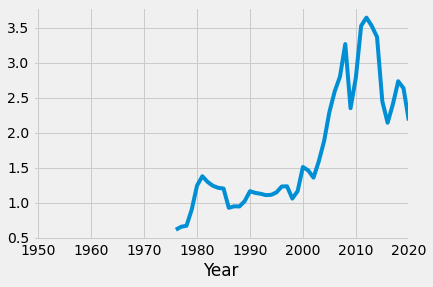

In [56]:
unleaded_avg.plot()

<AxesSubplot:xlabel='Year'>

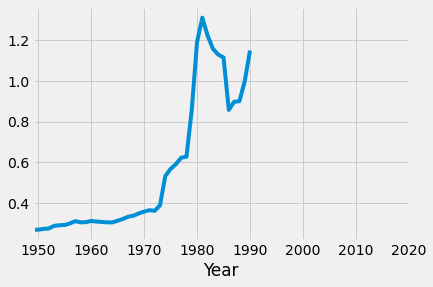

In [57]:
leaded_avg.plot()

Make a new data frame for unleaded and set the `Date` as the index

In [58]:
unleaded = pricedf[pricedf['MSN']=='RUUCUUS']['Value']

Now plot the values and the rolling mean (say every 4 years as an example)

Text(0, 0.5, '$/gal')

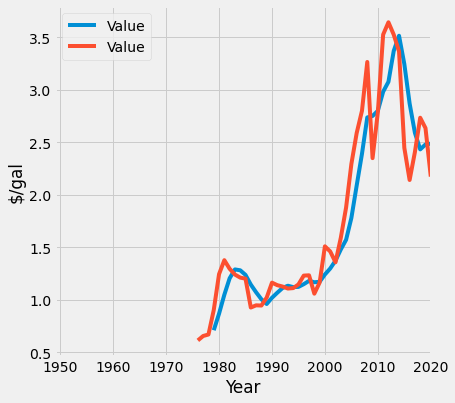

In [59]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

unleaded_avg.rolling(4).mean().plot(ax=ax)
unleaded_avg.plot(ax=ax)

ax.legend()
plt.ylabel('$/gal')

Make a new data frame for the `Real-World MPG` for `All Car` types:

In [60]:
real_mpg = ecodf[
    (ecodf['Vehicle Type']=='All Car')
]['Real-World MPG']

In [61]:
real_mpg.index.rename('Year', inplace=True)

In [62]:
real_mpg

Year
1975-01-01    13.45483
1976-01-01    14.86139
1977-01-01    15.58566
1978-01-01    16.93760
1979-01-01    17.24016
1980-01-01    20.01181
1981-01-01    21.41607
1982-01-01    22.20740
1983-01-01    22.08496
1984-01-01    22.42303
1985-01-01    22.98880
1986-01-01    23.69184
1987-01-01    23.75972
1988-01-01    24.08680
1989-01-01    23.64929
1990-01-01    23.29344
1991-01-01    23.25777
1992-01-01    22.87528
1993-01-01    22.99937
1994-01-01    23.01968
1995-01-01    23.27497
1996-01-01    23.11874
1997-01-01    23.16579
1998-01-01    23.01887
1999-01-01    22.70095
2000-01-01    22.51440
2001-01-01    22.63423
2002-01-01    22.78274
2003-01-01    23.01383
2004-01-01    22.85655
2005-01-01    23.14616
2006-01-01    23.02417
2007-01-01    23.70115
2008-01-01    23.87867
2009-01-01    24.97415
2010-01-01    25.70318
2011-01-01    25.38827
2012-01-01    26.87389
2013-01-01    27.64926
2014-01-01    27.62624
2015-01-01    28.23955
2016-01-01    28.52688
2017-01-01    29.18757
2018-0

In [63]:
unleaded_avg

Year
1949-01-01      NaN
1950-01-01      NaN
1951-01-01      NaN
1952-01-01      NaN
1953-01-01      NaN
              ...  
2016-01-01    2.142
2017-01-01    2.408
2018-01-01    2.735
2019-01-01    2.636
2020-01-01    2.174
Name: Value, Length: 72, dtype: float64

Now use `pdf.merge_asof`, paying close attention to `left_index`, `right_index`, and `direction`.

This should make a new data frame:

In [64]:
mpg_unleaded_df = pd.merge_asof(real_mpg, unleaded_avg, on='Year')

In [70]:
mpg_unleaded_df

Real-World MPG  Value
Year                             
1975-01-01        13.45483    NaN
1976-01-01        14.86139  0.614
1977-01-01        15.58566  0.656
1978-01-01        16.93760  0.670
1979-01-01        17.24016  0.903
1980-01-01        20.01181  1.245
1981-01-01        21.41607  1.378
1982-01-01        22.20740  1.296
1983-01-01        22.08496  1.241
1984-01-01        22.42303  1.212
1985-01-01        22.98880  1.202
1986-01-01        23.69184  0.927
1987-01-01        23.75972  0.948
1988-01-01        24.08680  0.946
1989-01-01        23.64929  1.022
1990-01-01        23.29344  1.164
1991-01-01        23.25777  1.140
1992-01-01        22.87528  1.127
1993-01-01        22.99937  1.108
1994-01-01        23.01968  1.112
1995-01-01        23.27497  1.147
1996-01-01        23.11874  1.231
1997-01-01        23.16579  1.234
1998-01-01        23.01887  1.059
1999-01-01        22.70095  1.165
2000-01-01        22.51440  1.510
2001-01-01        22.63423  1.461
2002-01-01        22.78274  1.358
2003-01-01        23.01383  1.591
2004-01-01        22.85655  1.880
2005-01-01        23.14616  2.295
2006-01-01        23.02417  2.589
2007-01-01        23.70115  2.801
2008-01-01        23.87867  3.266
2009-01-01        24.97415  2.350
2010-01-01        25.70318  2.788
2011-01-01        25.38827  3.527
2012-01-01        26.87389  3.644
2013-01-01        27.64926  3.526
2014-01-01        27.62624  3.367
2015-01-01        28.23955  2.448
2016-01-01        28.52688  2.142
2017-01-01        29.18757  2.408
2018-01-01        29.88541  2.735
2019-01-01        29.90685  2.636
2020-01-01        30.65809  2.174
2021-01-01        31.34905  2.174

In [ ]:
mpg_unleaded_df.set_index('Year',inplace=True)

Now plot the rolling mean and try to use two axis (a secondary `y`) for the MPG and the price of gas.

Text(0.5, 0, 'Year')

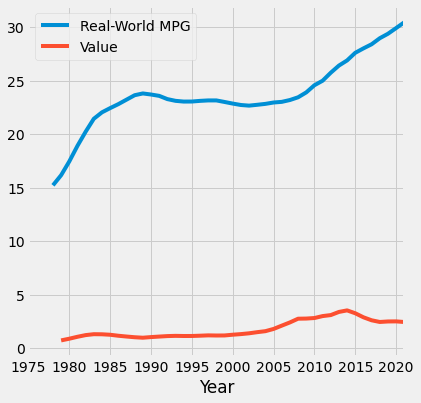

In [71]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

mpg_unleaded_df[['Real-World MPG', 'Value']].rolling(4).mean().plot(ax=ax)
ax.legend()
ax.set_xlabel('Year')

Challenge problem: find the correlation and use `jointplot`